In [1]:
from imutils import face_utils, paths
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [14]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [15]:
frame = cv2.imread("./imgs/jubin.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  

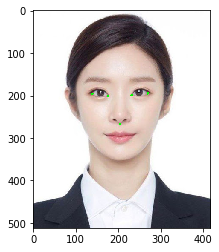

In [16]:
for k, d in enumerate(rects):
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape) #객체 내에서 필요한 좌표 정보만 넘파이 객체로 뽑음
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 3, (0, 255, 0), -1)

imshow("", frame)

In [8]:
import math

# 거리구하기
def distance(p1,p2):
    x = p2[0] - p1[0]    # x좌표 길이
    y = p2[1] - p1[1]    # y좌표 길이
    distance = math.sqrt((x * x) + (y * y))
    return distance

def ratio2(a,b):
    ratio = [a/a, b/a]
#    return "{:.2f} : {:.2f}".format(ratio[0], ratio[1])
    return ratio

def ratio3(a,b,c):
    ratio = [a/a, b/a, c/a]
#    return "{:.2f} : {:.2f} : {:.2f}".format(ratio[0], ratio[1], ratio[2])
    return ratio

In [9]:
# [1] 눈:눈사이:눈 = 1:1:1 

left_eye = distance(shape[36], shape[39])
between_eyes = distance(shape[42], shape[39])
# between_eyes = (distance(shape[31], shape[35]) + distance(shape[42], shape[39]))*0.5
right_eye = distance(shape[45], shape[42])

NameError: name 'shape' is not defined

In [45]:
ratio3(left_eye, between_eyes, right_eye)

# 주빈 --> 눈:눈사이:눈 = 1.0, 1.46, 0.97 / 1.00 : 1.19 : 0.97
# 태희 --> 눈:눈사이:눈 = 1.0, 1.37, 1.01 / 1.00 : 1.15 : 1.01
# 수지 --> 눈:눈사이:눈 = 1.0, 1.46, 1.0  / 1.00 : 1.23 : 1.00

[1.0, 1.461323476718244, 0.9741380089336856]

In [28]:
# [2] 이마:중안부:하안부 = 1:1:1
forehead = distance(shape[71], shape[27])
midsection = distance((shape[21]+shape[22])*0.5, shape[33])
lowersection = distance(shape[33], shape[8])

In [29]:
ratio3(forehead, midsection, lowersection)

# 주빈 --> 1.00 : 1.05 : 0.91
# 태희 --> 1.00 : 1.03 : 0.84
# 수지 --> 1.00 : 1.06 : 0.95

[1.0, 1.0461745325293472, 0.9055241595154735]

In [30]:
# [3] 인중:턱 = 1:2
philtrum = distance(shape[33], shape[62])
jaw = distance(shape[62], shape[8])

In [31]:
ratio2(philtrum, jaw)

# 주빈 --> 1.00 : 1.90
# 태희 --> 1.00 : 1.92
# 수지 --> 1.00 : 2.31

[1.0, 1.9002923751652299]

In [32]:
# [4] 얼굴 가로:얼굴 세로 = 1:1.618 ---> 머리통까지 포함된 비율이므로 조정필요
#                         1:1.3
width = distance(shape[1], shape[15])
length = distance((shape[69]+shape[72])*0.5, shape[8])

In [33]:
ratio2(width, length)

# 주빈 --> 1.00 : 1.43 / 1.00 : 1.27
# 태희 --> 1.00 : 1.50 / 1.00 : 1.31
# 수지 --> 1.00 : 1.37 / 1.00 : 1.23

[1.0, 1.2734465016360004]

In [34]:
# [5] 코:입술 = 1:1.618

nose = distance(shape[31], shape[35])
#nose = (distance(shape[31], shape[35]) + distance(shape[42], shape[39]))*0.5
mouth = distance(shape[48], shape[54])

In [35]:
ratio2(nose, mouth)

# 주빈 --> 1.00 : 1.97 / 1.00 : 1.52
# 태희 --> 1.00 : 1.96 / 1.00 : 1.57
# 수지 --> 1.00 : 2.02 / 1.00 : 1.63

[1.0, 1.9716355998955561]

In [36]:
# [6] 코:얼굴 폭 = 1:5

nose = distance(shape[31], shape[35])
width = distance(shape[1], shape[15])

In [37]:
ratio2(nose, width)

# 주빈 --> 1.00 : 5.86
# 태희 --> 1.00 : 5.44
# 수지 --> 1.00 : 5.61

[1.0, 5.857421596154919]

In [38]:
# [7] 얼굴 가로:하관 가로 = 1:0.8

width = distance(shape[0], shape[16])
lower_width = distance(shape[4], shape[12])

In [39]:
ratio2(width, lower_width)

# 주빈 --> 1.00 : 0.78
# 태희 --> 1.00 : 0.76
# 수지 --> 1.00 : 0.78

[1.0, 0.7810033418915668]

In [40]:
# 분석 결과,
# [1] 눈:눈사이:눈 = 1:1.4:1 
# 1) 이상적인 비율
# 2-1) 눈 사이가 가까워요   1:1.3:1
# 2-2) 눈 사이가 멀어요     1:1.5:1
# 3-1) 오른쪽 눈이 더 커요  1:__:1.1
# 3-2) 왼쪽 눈이 더 커요    1:__:0.9


# [2] 이마:중안부:하안부 = 1:1:1
# 1) 이상적인 비율
# 2-1) 중안부가 긴 편이에요     (이마+하안부)*0.5 < 중안부
# 2-2) 중안부가 짧은 편이에요   (이마+하안부)*0.5 > 중안부
# 3-1) 하안부가 긴 편이에요     (이마+중안부)*0.5 < 하안부 
# 3-2) 하안부가 짧은 편이에요   (이마+중안부)*0.5 > 하안부
# 4-1) 이마가 좁은 편이에요     (중안부+하안부)*0.5 > 이마
# 4-2) 이마가 넓은 편이에요     (중안부+하안부)*0.5 < 이마

# [3] 인중:턱 = 1:2
# 1) 이상적인 비율
# 2-1) 턱에 비해 인중이 긴 편이에요     1:1.8
# 2-2) 턱에 비해 인중이 짧은 편이에요   1:2.2

# [4] 얼굴 가로:얼굴 세로 = 1:1.3
# 1) 이상적인 비율
# 2) 얼굴이 긴 편이에요   1:1.4
# 3) 얼굴이 짧은 편이에요 1:1.2

# [5] 코:입술 = 1:2
# 1) 이상적인 비율
# 2-1) 입술이 큰 편이에요     1:2.1
# 2-2) 입술이 작은 편이에요   1:1.8


# [6] 코:얼굴 폭 = 1:5
# 1) 이상적인 비율        
# 2-1) 코가 큰 편이에요     1:4
# 2-2) 코가 작은 편이에요   1:6


# [7] 얼굴 가로:하관 가로 = 1:0.8
# 1) 이상적인 비율
# 2-1) 하안부가 넓은 편이에요  1:0.9
# 2-2) 하안부가 좁은 편이에요  1:0.6

In [70]:
# [1] 눈:눈사이:눈 = 1:1.4:1 
ratio_eyes = ratio3(left_eye, between_eyes, right_eye)

print("[1] 눈:눈사이:눈 = {:.2f} : {:.2f} : {:.2f}".format(ratio_eyes[0], ratio_eyes[1], ratio_eyes[2]))

if ratio_eyes[1]<1.3: 
    print("눈사이가 가까워요.")
elif ratio_eyes[1]>1.5:
    print("눈사이가 멀어요.")
elif ratio_eyes[2]<0.9:
    print("사진상에서 왼쪽 눈이 더 커요")
elif ratio_eyes[2]>1.1:
    print("사진상에서 오른쪽 눈이 더 커요")
else:
    print("눈의 비율이 이상적입니다.")
    

# [2] 이마:중안부:하안부 = 1:1:1
ratio_section = ratio3(forehead, midsection, lowersection)

print("[2] 이마:중안부:하안부 = {:.2f} : {:.2f} : {:.2f}".format(ratio_section[0], ratio_section[1], ratio_section[2]))


if ratio_section[1] > 1 and ratio_section[2] > 1:
    print("이마가 짧은편이에요.")
elif ratio_section[1] < 1 and ratio_section[2] < 1:
    print("이마가 긴편이에요.")
elif ratio_section[1] > 1.05:
    print("중안부가 긴편이에요.")
elif ratio_section[1] < 0.95:
    print("중안부가 짧은편이에요.")
elif ratio_section[2] > 1.05:
    print("하안부가 긴편이에요.")
elif ratio_section[2] < 0.95:
    print("하안부가 짧은편이에요.")
else:
    print("이마:중안부:하안부의 비율이 이상적입니다.")


# [3] 인중:턱 = 1:2
ratio_jaw = ratio2(philtrum, jaw)

print("[3] 인중:턱  = {:.2f} : {:.2f}".format(ratio_jaw[0], ratio_jaw[1]))

if ratio_jaw[1] > 2.1:
    print("인중에 비해 턱이 긴 편입니다.")
elif ratio_jaw[1] < 1.9:
    print("인중에 비해 턱이 짧은 편입니다.")
else:
    print("인중과 턱의 비율이 이상적입니다.")

# [4] 얼굴 가로:얼굴 세로 = 1:1.3
ratio_width = ratio2(width, length)

print("[4] 얼굴 폭:얼굴 높이  = {:.2f} : {:.2f}".format(ratio_width[0], ratio_width[1]))

if ratio_width[1] < 1.2:
    print("얼굴이 짧은 편입니다.")
elif ratio_width[1] > 1.4:
    print("얼굴이 긴 편입니다.")
else:
    print("얼굴 폭과 얼굴 높이의 비율이 이상적입니다.")

# [5] 코:입술 = 1:2
ratio_mouth = ratio2(nose, mouth)

print("[5] 코:입술  = {:.2f} : {:.2f}".format(ratio_mouth[0], ratio_mouth[1]))

if ratio_mouth[1] > 2.05 :
    print("입술이 큰 편입니다.")
elif ratio_mouth[1] <1.95:
    print("입술이 작은 편입니다.")
else:
    print("입술의 비율이 이상적입니다.")

# [6] 코:얼굴 폭 = 1:5
ratio_nose = ratio2(nose, width)

print("[6] 코:얼굴 폭  = {:.2f} : {:.2f}".format(ratio_nose[0], ratio_nose[1]))

if ratio_nose[1] > 5.8:
    print("코가 작은편입니다.")
elif ratio_nose[1] < 5.0:
    print("코가 큰편입니다.")
else:
    print("코의 비율이 이상적입니다.")

# [7] 얼굴 가로:하관 가로 = 1:0.8
ratio_lower = ratio2(width, lower_width)

print("[7] 얼굴 폭:하관 폭  = {:.2f} : {:.2f}".format(ratio_lower[0], ratio_lower[1]))

if ratio_lower[1] < 0.75:
    print("하관이 좁은 편입니다.")
elif ratio_lower[1] > 0.81:
    print("하관이 넓은 편입니다.")
else:
    print("하관의 비율이 이상적입니다.")

[1] 눈:눈사이:눈 = 1.00 : 1.46 : 0.97
눈의 비율이 이상적입니다.
[2] 이마:중안부:하안부 = 1.00 : 1.05 : 0.91
하안부가 짧은편이에요.
[3] 인중:턱  = 1.00 : 1.90
인중과 턱의 비율이 이상적입니다.
[4] 얼굴 폭:얼굴 높이  = 1.00 : 1.24
얼굴 폭과 얼굴 높이의 비율이 이상적입니다.
[5] 코:입술  = 1.00 : 1.97
입술의 비율이 이상적입니다.
[6] 코:얼굴 폭  = 1.00 : 6.00
코가 작은편입니다.
[7] 얼굴 폭:하관 폭  = 1.00 : 0.78
하관의 비율이 이상적입니다.


In [ ]:
frame = cv2.imread("./imgs/jubin.jpg")

def faceLandmark68(frame):
    predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")
    detector = dlib.get_frontal_face_detector()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)  
    
    for k, d in enumerate(rects):
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape) 
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

    return  frame

In [ ]:
def faceRatio(frame):
    predictor = dlib.shape_predictor("shape_predictor_81_face_landmarks.dat")
    detector = dlib.get_frontal_face_detector()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)

    for k, d in enumerate(rects):
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for (x, y) in shape:
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

    left_eye = distance(shape[36], shape[39])
    between_eyes = distance(shape[42], shape[39])
    right_eye = distance(shape[45], shape[42])

    forehead = distance(shape[71], shape[27])
    midsection = distance((shape[21]+shape[22])*0.5, shape[33])
    lowersection = distance(shape[33], shape[8])

    philtrum = distance(shape[33], shape[62])
    jaw = distance(shape[62], shape[8])

    width = distance(shape[1], shape[15])
    length = distance((shape[69]+shape[72])*0.5, shape[8])

    nose = distance(shape[31], shape[35])
    mouth = distance(shape[48], shape[54])

    width = distance(shape[0], shape[16])
    lower_width = distance(shape[4], shape[12])



    # [1] 눈:눈사이:눈 = 1:1.4:1 
    ratio_eyes = ratio3(left_eye, between_eyes, right_eye)
    
    print("[1] 눈:눈사이:눈 = {:.2f} : {:.2f} : {:.2f}".format(ratio_eyes[0], ratio_eyes[1], ratio_eyes[2]))
    
    if ratio_eyes[1]<1.3: 
        print("눈사이가 가까워요.")
    elif ratio_eyes[1]>1.5:
        print("눈사이가 멀어요.")
    elif ratio_eyes[2]<0.9:
        print("사진상에서 왼쪽 눈이 더 커요")
    elif ratio_eyes[2]>1.1:
        print("사진상에서 오른쪽 눈이 더 커요")
    else:
        print("눈의 비율이 이상적입니다.")
        
    
    # [2] 이마:중안부:하안부 = 1:1:1
    ratio_section = ratio3(forehead, midsection, lowersection)
    
    print("[2] 이마:중안부:하안부 = {:.2f} : {:.2f} : {:.2f}".format(ratio_section[0], ratio_section[1], ratio_section[2]))
    
    
    if ratio_section[1] > 1 and ratio_section[2] > 1:
        print("이마가 짧은편이에요.")
    elif ratio_section[1] < 1 and ratio_section[2] < 1:
        print("이마가 긴편이에요.")
    elif ratio_section[1] > 1.05:
        print("중안부가 긴편이에요.")
    elif ratio_section[1] < 0.95:
        print("중안부가 짧은편이에요.")
    elif ratio_section[2] > 1.05:
        print("하안부가 긴편이에요.")
    elif ratio_section[2] < 0.95:
        print("하안부가 짧은편이에요.")
    else:
        print("이마:중안부:하안부의 비율이 이상적입니다.")
    
    
    # [3] 인중:턱 = 1:2
    ratio_jaw = ratio2(philtrum, jaw)
    
    print("[3] 인중:턱  = {:.2f} : {:.2f}".format(ratio_jaw[0], ratio_jaw[1]))
    
    if ratio_jaw[1] > 2.1:
        print("인중에 비해 턱이 긴 편입니다.")
    elif ratio_jaw[1] < 1.9:
        print("인중에 비해 턱이 짧은 편입니다.")
    else:
        print("인중과 턱의 비율이 이상적입니다.")
    
    # [4] 얼굴 가로:얼굴 세로 = 1:1.3
    ratio_width = ratio2(width, length)
    
    print("[4] 얼굴 폭:얼굴 높이  = {:.2f} : {:.2f}".format(ratio_width[0], ratio_width[1]))
    
    if ratio_width[1] < 1.2:
        print("얼굴이 짧은 편입니다.")
    elif ratio_width[1] > 1.4:
        print("얼굴이 긴 편입니다.")
    else:
        print("얼굴 폭과 얼굴 높이의 비율이 이상적입니다.")
    
    # [5] 코:입술 = 1:2
    ratio_mouth = ratio2(nose, mouth)
    
    print("[5] 코:입술  = {:.2f} : {:.2f}".format(ratio_mouth[0], ratio_mouth[1]))
    
    if ratio_mouth[1] > 2.05 :
        print("입술이 큰 편입니다.")
    elif ratio_mouth[1] <1.95:
        print("입술이 작은 편입니다.")
    else:
        print("입술의 비율이 이상적입니다.")
    
    # [6] 코:얼굴 폭 = 1:5
    ratio_nose = ratio2(nose, width)
    
    print("[6] 코:얼굴 폭  = {:.2f} : {:.2f}".format(ratio_nose[0], ratio_nose[1]))
    
    if ratio_nose[1] > 5.8:
        print("코가 작은편입니다.")
    elif ratio_nose[1] < 5.0:
        print("코가 큰편입니다.")
    else:
        print("코의 비율이 이상적입니다.")
    
    # [7] 얼굴 가로:하관 가로 = 1:0.8
    ratio_lower = ratio2(width, lower_width)
    
    print("[7] 얼굴 폭:하관 폭  = {:.2f} : {:.2f}".format(ratio_lower[0], ratio_lower[1]))
    
    if ratio_lower[1] < 0.75:
        print("하관이 좁은 편입니다.")
    elif ratio_lower[1] > 0.81:
        print("하관이 넓은 편입니다.")
    else:
        print("하관의 비율이 이상적입니다.")